# N-Queens Problem
https://en.wikipedia.org/wiki/Eight_queens_puzzle

In [15]:
N_max = 12

In [44]:
from itertools import permutations
import numpy as np

def get_diagonals_table(W):
    diag  = np.eye(W*2-1,dtype=bool)
    cross = np.vstack([np.where(diag + diag[:,::-1])]).T-(W-1)
    diags = []
    for i in range(W):
        row=[]
        for j in range(W):
            queen = [i,j]
            row.append( np.array([*filter(lambda x: (x>= 0).all() and (x<W).all(), cross +  queen )]))
        diags.append(row)
    return diags

def find_n_queens_solutions(W):
    diags = get_diagonals_table(W);
    permuts = permutations(range(W))
    row = np.arange(W);
    solutions=[]
    c = 0;
    for col in permuts:
        a = np.array(col)
        diff = np.abs(a[1:]-a[0:-1])
        if (diff ==1).any():
            conflict=True;
        else:
            occupied = np.full((1,2),-1)
            for i,j in zip(range(W),col):
                q = [i,j]
                conflict = np.any(np.sum( occupied == q,axis=1)==2)
                if conflict:
                    break;
                else:
                    occupied = np.vstack( [occupied,diags[i][j]])
        if not(conflict):
            solutions.append(col)
    return solutions

def print_solution(sol,ax2=[],symb='♛'):
#     ♖
    L = len(sol)
    T = np.full((L,L),'.')
    if ax2==[]:
        ax2=np.arange(L)
    for i,j in zip(ax2,sol):
        T[i,j] = symb
    print('-'*(2*L+1))
    [print( "|"+ ' '.join(r)+"|") for r in T];  
    print('-'*(2*L+1))
    
for i in range(1,6):
    solutions = find_n_queens_solutions(i)
    k = len(solutions) 
    print(f'For board size {i} Found : {k} solutions' )
    if solutions:
        print_solution(solutions[0]);
    

For board size 1 Found : 1 solutions
---
|♖|
---
For board size 2 Found : 0 solutions
For board size 3 Found : 0 solutions
For board size 4 Found : 2 solutions
---------
|. ♖ . .|
|. . . ♖|
|♖ . . .|
|. . ♖ .|
---------
For board size 5 Found : 10 solutions
-----------
|♖ . . . .|
|. . ♖ . .|
|. . . . ♖|
|. ♖ . . .|
|. . . ♖ .|
-----------


In [17]:
def calc_symmetrical(solution):
    c = np.array(solution)

    sym = []
    L = len(c)
    h = np.arange(L)

    sym.append([c,h])
    sym.append([c[::-1],h])
    sym.append([c      *-1 + L-1,h])
    sym.append([c[::-1]*-1 + L-1,h])

    sym+= [s[::-1] for s in sym]
    sym=[np.array(s) for s in sym]
    sym=[s[:,np.argsort(s[1,:])] for s in sym]
    sym=[s[0] for s in sym]
    sym = list(np.unique( np.array(sym),axis=0 ))
    return sym
    
sym_group = calc_symmetrical(solutions[3])
names = ['#0 Source',
         '#1 Flip Horizontal',
         '#2 Flip Vertical',
         '#3 Rotate 180',
         '#4 Diagonal \\ ',
         '#5 Rotate 90',
         '#6 Rotate 270',
         '#7 Digonal /',
         ]
print( )
for coord,n in zip(sym_group,names):
    print(n)
    print_solution(coord)


#0 Source
-----------------------
|Q . . . . . . . . . .|
|. . Q . . . . . . . .|
|. . . . . . Q . . . .|
|. . . . . . . . . Q .|
|. Q . . . . . . . . .|
|. . . . . . . . Q . .|
|. . . . . Q . . . . .|
|. . . Q . . . . . . .|
|. . . . . . . . . . Q|
|. . . . . . . Q . . .|
|. . . . Q . . . . . .|
-----------------------
#1 Flip Horizontal
-----------------------
|Q . . . . . . . . . .|
|. . . . Q . . . . . .|
|. Q . . . . . . . . .|
|. . . . . . . Q . . .|
|. . . . . . . . . . Q|
|. . . . . . Q . . . .|
|. . Q . . . . . . . .|
|. . . . . . . . . Q .|
|. . . . . Q . . . . .|
|. . . Q . . . . . . .|
|. . . . . . . . Q . .|
-----------------------
#2 Flip Vertical
-----------------------
|. . Q . . . . . . . .|
|. . . . . . . Q . . .|
|. . . . . Q . . . . .|
|. Q . . . . . . . . .|
|. . . . . . . . Q . .|
|. . . . Q . . . . . .|
|Q . . . . . . . . . .|
|. . . Q . . . . . . .|
|. . . . . . . . . Q .|
|. . . . . . Q . . . .|
|. . . . . . . . . . Q|
-----------------------
#3 Rotate 180
---

In [38]:
def group_solutions(solutions):
    solution_groups = [calc_symmetrical(solutions[0])]
    for solution in solutions:
        exists = False
        for group in solution_groups:
            exists =  (group == np.array(solution)).all(axis=1).any()
            if exists:
                break
        if not(exists):
            solution_groups.append(calc_symmetrical(solution) )
    return solution_groups



solutions = find_n_queens_solutions(12)
print(f"{len(solutions)} :  Total Solutions")


solution_groups = group_solutions(solutions);

unique, counts = np.unique([*map(lambda x: len(x), solution_groups)], return_counts=True)

print(f"{len(solution_groups)} :  Fundamental Solutions or Groups")
[print(f"{K} groups with {N} solutions ") for N,K in zip(unique, counts)];


KeyboardInterrupt: 

In [113]:
from itertools import permutations
import numpy as np
W  = 8

def check_unique(x):
    return len(x) == len(np.unique(x))
x        = np.arange(W)
permuts  = np.array([*permutations(range(W))], dtype=np.int8)
d =  np.apply_along_axis(check_unique, 1, permuts-x) * np.apply_along_axis(check_unique, 1, permuts+x)
print(sum(d))






92


In [ ]:
from itertools import permutations
import numpy as np
W  = 12

def check_unique(x):
    return len(x) == len(np.unique(x))
x        = np.arange(W)
solutions=[]
for permut in permutations(range(W)):
    valid = np.prod(np.apply_along_axis(check_unique, 1, np.array([permut+x,permut-x])));
    if valid:
        solutions.append(permut)
print('Total Solutions %5d'%len(solutions))        
        




In [72]:
W = 8
comb = [i for i in range(W**2-W+1,W**2+1)][::-1]
for i,c in enumerate(comb):
    print(f'{c} places for {i+1} queen')

print(f'Total Amount of combinations {np.prod(comb)*(-1):,}')    


64 places for 1 queen
63 places for 2 queen
62 places for 3 queen
61 places for 4 queen
60 places for 5 queen
59 places for 6 queen
58 places for 7 queen
57 places for 8 queen
Total Amount of combinations 1,493,445,632


Some obvious observation:
* 2 quens can't share common row. It means that for K queens on K*K desk we must use each row.
* The same true for columns, so have to use each column
    
    

In [82]:
from  math import factorial
for i in range(1,12):
    print(f'Board size of {i:2}x{i:2} , Rook combinations : {factorial(i):10,} ')

Board size of  1x 1 , Rook combinations :          1 
Board size of  2x 2 , Rook combinations :          2 
Board size of  3x 3 , Rook combinations :          6 
Board size of  4x 4 , Rook combinations :         24 
Board size of  5x 5 , Rook combinations :        120 
Board size of  6x 6 , Rook combinations :        720 
Board size of  7x 7 , Rook combinations :      5,040 
Board size of  8x 8 , Rook combinations :     40,320 
Board size of  9x 9 , Rook combinations :    362,880 
Board size of 10x10 , Rook combinations :  3,628,800 
Board size of 11x11 , Rook combinations : 39,916,800 


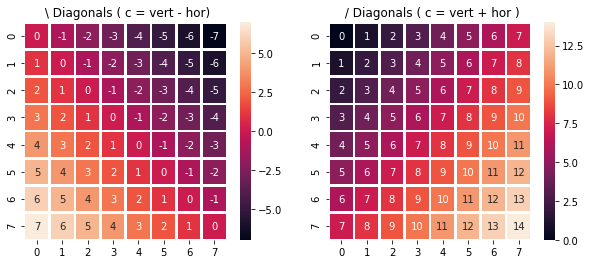

In [89]:
W = 8
desk_A = np.zeros([W,W],np.int8)
desk_B = np.zeros([W,W],np.int8)

for i in range(W):
    for j in range(W):
        desk_A[i,j] = i-j;
        desk_B[i,j] = i+j;

import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
sns.heatmap(desk_A, linewidth=1.5,annot=True, ax = ax1)
sns.heatmap(desk_B, linewidth=1.5,annot=True, ax = ax2)
ax1.set_title(' \\ Diagonals ( c = vert - hor)')
ax2.set_title(' / Diagonals ( c = vert + hor )')
plt.show()



Simple condition

Each queen has two coordinates $X,Y$, defining horizontal and vertical coordinates
* If Two Queens has the same $X - Y$ value, they stand on the same "/" diagonal
* If Two Queens has the same $X + Y$ value, they stand on the same "\" diagonal

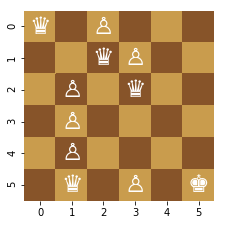

In [63]:
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

CS = {''.join(n):f for n,f in zip(list(itertools.product('wb', 'KQRBNP')),'♔C♖♗♘♙♚♛♜♝♞♟')}

def get_starting_position():
    chess_fig = np.full((8,8),' ')
    first_line='RBNKQNBR'
    chess_fig[0]  = [CS['b'+s] for s in first_line]
    chess_fig[1]  = [CS['bP']]
    chess_fig[-2] = [CS['wP']]
    chess_fig[-1] = [CS['w'+s] for s in first_line]
    return chess_fig
def print_chess_board(pos):
    pos
    for r in pos:
        print(' '.join(r))
def sns_chess_board( pos ,ax=None):
    desk = np.zeros(pos.shape,dtype=int)
    desk[1::2,::2] = 1
    desk[::2,1::2] = 1

    return sns.heatmap(desk,
            fmt="s",
            cbar=False,
            square=True,
            annot=pos,
            cmap=ListedColormap(['#c99c4d','#875429']),
            annot_kws={"size": 24},
            ax = ax,
            linewidths=0)
        

pos = get_starting_position();
pos[0,0]="♛"
# print_chess_board(pos)
# sns_chess_board(pos)


def list_to_figures_board(v, x = None, fig_type = 'bQ', board_size=None,chess_fig=None):
    if x is None:
        x = np.arange(len(v))
    
    coord = np.vstack([x,v]).T
    
    if board_size is None: 
        board_size =np.max(coord)+1;
    
    if chess_fig is None: 
        chess_fig = np.full((board_size,board_size),' ')
    
    for c in coord:
        chess_fig[c[0],c[1]] = CS[fig_type]
    return chess_fig

chess_fig = list_to_figures_board([0,2,3,1,1,1])
chess_fig = list_to_figures_board([2,3,1,1,1,3],fig_type='wP',chess_fig=chess_fig)
chess_fig = list_to_figures_board(v=[5],x=[5],  fig_type='bK',chess_fig=chess_fig)

fig, ax = plt.subplots(figsize=(3.5,3.5))         # Sample figsize in inches
ax =  sns_chess_board(chess_fig);


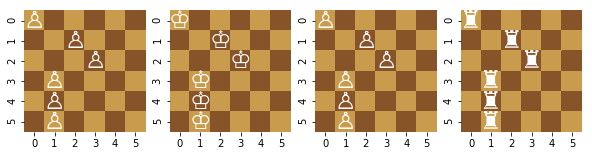

In [72]:
fig, ax = plt.subplots(1,4, figsize=(10,4))
print(ax)
sns_chess_board(list_to_figures_board([0,2,3,1,1,1],fig_type='wP'),ax[0]);
sns_chess_board(list_to_figures_board([0,2,3,1,1,1],fig_type='wK'),ax[1]);
sns_chess_board(list_to_figures_board([0,2,3,1,1,1],fig_type='wP'),ax[2]);
sns_chess_board(list_to_figures_board([0,2,3,1,1,1],fig_type='bR'),ax[3]);
